In [17]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

file_path = 'cogniy_data.csv'  
data = pd.read_csv(file_path)
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(restaurant_map)
restaurant_map.save('restaurant_distribution_map.html')
restaurant_map



In [18]:

city_group = data.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Cuisines': lambda x: x.mode(), 
    'Price range': 'mean'
}).reset_index()

city_group

,City,Aggregate rating,Cuisines,Price range
0,Abu Dhabi,4.300000,"[American, Indian, Italian, Pizza]",3.300000
1,Agra,3.965000,"North Indian, Mughlai",2.650000
2,Ahmedabad,4.161905,"[Cafe, American, Continental, Armenian, Fast F...",2.571429
3,Albany,3.555000,"Japanese, Steak, Sushi",1.700000
4,Allahabad,3.395000,"North Indian, Chinese",2.650000
...,...,...,...,...
136,Weirton,3.900000,"Burger, Greek, Sandwich",2.000000
137,Wellington City,4.250000,Cafe,3.250000
138,Winchester Bay,3.200000,"Burger, Seafood, Steak",2.000000
139,Yorkton,3.300000,Asian,2.000000


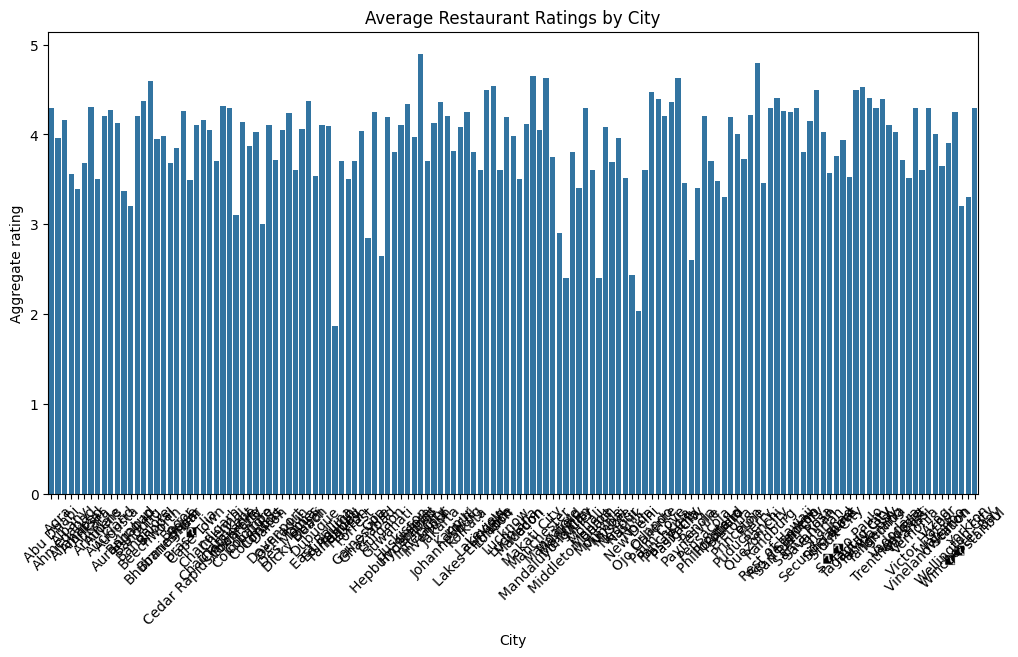

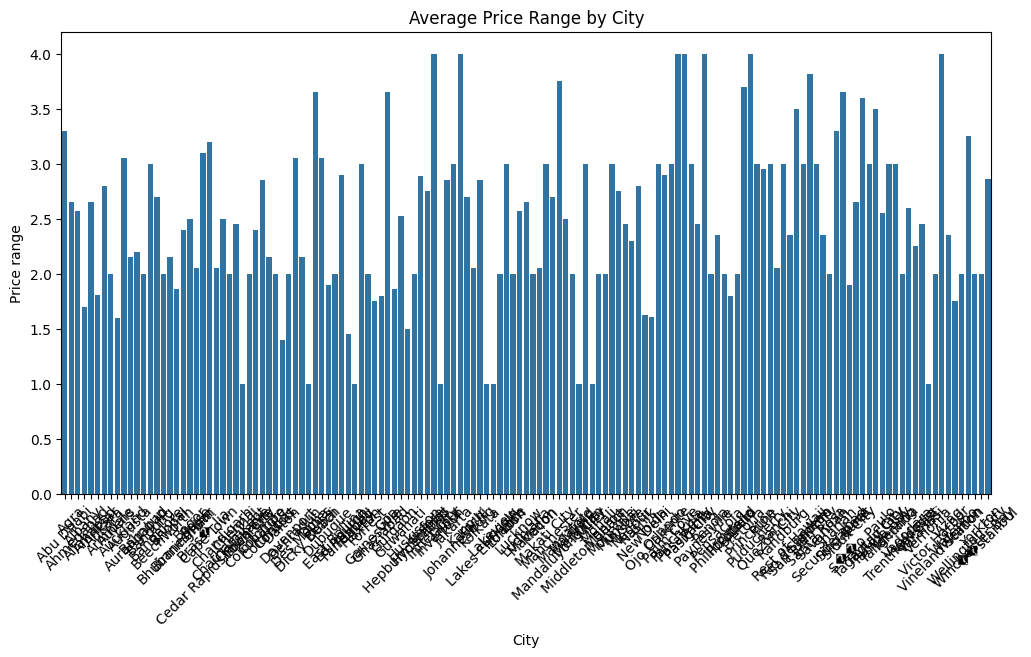

Top 10 cities with highest average rating:
                 City  Aggregate rating  \
56         Inner City          4.900000   
107       Quezon City          4.800000   
73        Makati City          4.650000   
95         Pasig City          4.633333   
75   Mandaluyong City          4.625000   
15         Beechworth          4.600000   
67             London          4.535000   
123       Taguig City          4.525000   
116      Secunderabad          4.500000   
66            Lincoln          4.500000   

                                              Cuisines  Price range  
56                     [European, Contemporary, Tapas]         4.00  
107                                  Filipino, Mexican         3.00  
73              [French, Japanese, Desserts, Japanese]         3.00  
95   [American, Ice Cream, Desserts, Filipino, Fili...         3.00  
75   [Chinese, Japanese, Korean, Japanese, Sushi, S...         3.75  
15                                     Pizza, Bar Food         

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Aggregate rating', data=city_group)
plt.xticks(rotation=45)
plt.title('Average Restaurant Ratings by City')
plt.show()

# Visualize average price range by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price range', data=city_group)
plt.xticks(rotation=45)
plt.title('Average Price Range by City')
plt.show()

# Identify top 10 cities with highest average rating
top_rated_cities = city_group.sort_values(by='Aggregate rating', ascending=False).head(10)
print("Top 10 cities with highest average rating:")
print(top_rated_cities)

# Identify most common cuisine by city
common_cuisines = data.groupby('City')['Cuisines'].apply(lambda x: x.mode()).reset_index()
print("Most common cuisine by city:")
print(common_cuisines)

In [10]:
new_city=city_group.describe()
new_city

,Aggregate rating,Price range
count,141.000000,141.000000
mean,3.888002,2.476462
std,0.531975,0.737628
min,1.866932,1.000000
25%,3.600000,2.000000
50%,4.030000,2.450000
75%,4.255000,3.000000
max,4.900000,4.000000
